# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
pd.options.mode.chained_assignment = None  
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st


## Load data

In [2]:
# Load the data files into different DataFrames

df_calls = pd.read_csv('/datasets/megaline_calls.csv')

df_internet = pd.read_csv('/datasets/megaline_internet.csv')

df_messages = pd.read_csv('/datasets/megaline_messages.csv')

df_plans = pd.read_csv('/datasets/megaline_plans.csv')

df_users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

In [3]:
display(df_users)
#missing values in churn date means user has not terminated the service

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [4]:
display(df_plans)
#data is good here

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [5]:
display(df_messages)
#change column name id to messgae: easier to understand


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [6]:
display(df_internet)
#change column name id to session
#see how many 0 values in mb_used and analyze

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [7]:
display(df_calls)
#convert values in duration to time

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


## Plans

In [8]:
# Print the general/summary information about the plans' DataFrame
#dtype is correct
print(df_plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [9]:
#study the columns in plans
display(df_plans.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


dtype is correct... 8 columns(plan details), two rows(the plans)...i have all the details i need for analyzing the two plans the company offers... no missing values (indicated in fix data 1.4.1)


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [10]:
#check for missing values
df_plans.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [11]:
#rename plan_name to plan
df_plans.rename(columns = {"plan_name":"plan"},inplace=True)

In [12]:
df_plans['gb_per_month_included'] = np.ceil(df_plans['mb_per_month_included']/1024)
df_plans['gb_per_month_included'].head()

0    15.0
1    30.0
Name: gb_per_month_included, dtype: float64

In [13]:
del df_plans['mb_per_month_included']

## Users

In [14]:
# Print the general/summary information about the users' DataFrame
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [15]:
# Print a sample of data for users
display(df_users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

I see what plan each user had, the details include: the first and last name of the user, their age, location, and the day they got the plan. It also has a column if the user terminated their service. I need to chage the dtype of the registration date. If churn date has any missing values, it means they have not cancelled. 

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [16]:
#fix dtype
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])

In [17]:
#check for missing values 
df_users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [18]:
#day of week column 
df_users['day_of_week'] = pd.DatetimeIndex(df_users['reg_date']).weekday

df_users['day_of_week'].unique().tolist()

[0, 6, 2, 3, 1, 4, 5]

In [19]:
#month column
df_users['reg_month'] = df_users['reg_date'].dt.month
df_users['reg_month'].unique().tolist()

[12, 8, 10, 1, 5, 11, 7, 4, 3, 6, 2, 9]

## Calls

In [20]:
# Print the general/summary information about the calls' DataFrame
print(df_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [21]:
# Print a sample of data for calls
display(df_calls.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [22]:
#check for missing values
df_calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

This shows call usage. I see call and duration, with a corresponding date. I will fix the dtype for call_date. 

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [23]:
#fix dtype
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [24]:
#day of week column 
df_calls['day_of_week'] = pd.DatetimeIndex(df_calls['call_date']).weekday

df_calls['day_of_week'].unique().tolist()

[3, 4, 6, 0, 2, 5, 1]

In [25]:
#month column
df_calls['month'] = df_calls['call_date'].dt.month
df_calls['month'].unique().tolist()

[12, 9, 10, 11, 8, 7, 6, 5, 3, 4, 2, 1]

In [26]:
#round numbers in duration
df_calls['duration'] = df_calls['duration'].round()
df_calls['duration'].head()

0     9.0
1    14.0
2    14.0
3     6.0
4     4.0
Name: duration, dtype: float64

In [27]:
#make durstion int
df_calls['duration'] = df_calls['duration'].astype(int)
df_calls['duration'].head()

0     9
1    14
2    14
3     6
4     4
Name: duration, dtype: int64

In [28]:
# change id to call_id
df_calls.rename(columns = {"id": "call_id"}, inplace=True)

## Messages

In [29]:
# Print the general/summary information about the messages' DataFrame
print(df_messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [30]:
# Print a sample of data for messages
display(df_messages.head())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

I see message usage of each user, with a corresponding date. I will cahnge dtype of the id and message_date. 

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [31]:
#make id int
df_messages['id'] = df_messages['id'].astype(int)

In [32]:
#message_date should be date dtype
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

In [33]:
#check for missing values
df_messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [34]:
#day of week column 
df_messages['day_of_week'] = pd.DatetimeIndex(df_messages['message_date']).weekday

df_messages['day_of_week'].unique().tolist()

[3, 0, 2, 5, 6, 4, 1]

In [35]:
#month column
df_messages['month'] = df_messages['message_date'].dt.month
df_messages['month'].unique().tolist()

[12, 11, 8, 10, 9, 6, 7, 5, 4, 3, 2, 1]

## Internet

In [36]:
# Print the general/summary information about the internet DataFrame
print(df_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [37]:
# Print a sample of data for the internet traffic
display(df_internet.head())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

I see the data usage each session with a corresponding date. fix the dtype for session date and id

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [38]:
#session date convert to date dtype
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

In [39]:
#internet id make int
df_internet['id'] = df_internet['id'].astype(int)

In [40]:
#check for missing values 
df_internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [41]:
#round mb to gb (divide mb by 1024)
df_internet['gb_used'] = df_internet['mb_used']/1024

In [42]:
#delete column
del df_internet['mb_used']

In [43]:
#day of week column
df_internet['day_of_week'] = pd.DatetimeIndex(df_internet['session_date']).weekday
df_internet['day_of_week'].unique().tolist()

[5, 0, 4, 2, 3, 6, 1]

In [44]:
#month column
df_internet['month'] = df_internet['session_date'].dt.month
df_internet['month'].unique().tolist()

[12, 8, 11, 10, 9, 7, 6, 5, 3, 4, 2, 1]

In [45]:
#id to internet_id
df_internet.rename(columns = {"id": "internet_id"}, inplace=True)

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [46]:
# Print out the plan conditions and make sure they are clear for you
df_plans

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


## Aggregate data per user per month

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [47]:
#agg internet usage: find how much internet each user used, each month 
cols = ['user_id','month','gb_used']
df_internet_agg = df_internet[cols]
df_internet_agg = df_internet_agg.groupby(['user_id','month']).sum().reset_index()
display(df_internet_agg)

,user_id,month,gb_used
0,1000,12,1.856904
1,1001,8,6.756982
2,1001,9,13.002754
3,1001,10,21.807119
4,1001,11,18.070605
...,...,...,...
2272,1498,12,22.595400
2273,1499,9,12.680430
2274,1499,10,19.035576
2275,1499,11,16.419756


In [48]:
#find the minutes(duration) each user used, each month
cols = ['user_id','month','duration']
df_calls_agg = df_calls[cols]
df_calls_agg = df_calls_agg.groupby(['user_id','month']).sum().reset_index()
display(df_calls_agg)

,user_id,month,duration
0,1000,12,117
1,1001,8,173
2,1001,9,297
3,1001,10,374
4,1001,11,404
...,...,...,...
2253,1498,12,326
2254,1499,9,328
2255,1499,10,361
2256,1499,11,287


In [49]:
#find the message count for each user, each month
cols = ['user_id','month','id']
df_messages_agg = df_messages[cols]
df_messages_agg = df_messages_agg.groupby(['user_id','month']).count().reset_index()
df_messages_agg.rename(columns = {"id":"message_count"},inplace=True)
display(df_messages_agg)

,user_id,month,message_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [50]:
#create a subset to see which plan each user has, and if they still have that plan
cols =['user_id','plan','churn_date']
df_users_subs = df_users[cols]
df_users_subs

,user_id,plan,churn_date
0,1000,ultimate,NaN
1,1001,surf,NaN
2,1002,surf,NaN
3,1003,surf,NaN
4,1004,surf,NaN
...,...,...,...
495,1495,surf,NaN
496,1496,surf,NaN
497,1497,ultimate,NaN
498,1498,surf,NaN


In [51]:
#shape agg tables: keep in mind when merging 
print( df_calls_agg.shape, df_internet_agg.shape, df_messages_agg.shape)

(2258, 3) (2277, 3) (1806, 3)


In [52]:
#merge df_calls_agg with df_internet_agg
#outer retains all rows
#check shape
print( df_calls_agg.shape, df_internet_agg.shape )
df_agg = pd.merge(df_calls_agg, df_internet_agg, how='outer', on = ['user_id','month'])
print( df_agg.shape )

(2258, 3) (2277, 3)
(2292, 4)


In [53]:
#merge df_agg with df_messages_agg 
#outer retains all rows
#check shape
print( df_agg.shape, df_messages_agg.shape )
df_agg = pd.merge(df_agg, df_messages_agg, how='outer', on = ['user_id','month'])
print( df_agg.shape )

(2292, 4) (1806, 3)
(2293, 5)


In [54]:
#merge df_agg with df_users_subs 
#keep rows from left df (make df_users_subs the right df bc only has 500 rows)
#check shape
print( df_agg.shape, df_users_subs.shape )
df_agg = pd.merge(df_agg, df_users_subs, how='left', on = ['user_id'])
print( df_agg.shape )

(2293, 5) (500, 3)
(2293, 7)


In [55]:
#check df_agg for missing values
df_agg[df_agg['plan'].isnull()]

,user_id,month,duration,gb_used,message_count,plan,churn_date


In [56]:
#merge df_agg with df_plans 
#keep rows from left df (make df_users_subs the right bc only has 500 rows)
#check shape
print( df_agg.shape, df_plans.shape )
df_agg = pd.merge(df_agg, df_plans, how='left', on = ['plan'])
print( df_agg.shape )

(2293, 7) (2, 8)
(2293, 14)


In [57]:
#check df_agg
df_agg
#now I can see all in one row: what person used each month, what plan they have, the details of the plan

,user_id,month,duration,gb_used,message_count,plan,churn_date,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,12,117.0,1.856904,11.0,ultimate,NaN,1000,3000,70,7,0.01,0.01,30.0
1,1001,8,173.0,6.756982,30.0,surf,NaN,50,500,20,10,0.03,0.03,15.0
2,1001,9,297.0,13.002754,44.0,surf,NaN,50,500,20,10,0.03,0.03,15.0
3,1001,10,374.0,21.807119,53.0,surf,NaN,50,500,20,10,0.03,0.03,15.0
4,1001,11,404.0,18.070605,36.0,surf,NaN,50,500,20,10,0.03,0.03,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,10,NaN,12.786670,76.0,surf,NaN,50,500,20,10,0.03,0.03,15.0
2289,1349,11,NaN,16.726816,72.0,surf,NaN,50,500,20,10,0.03,0.03,15.0
2290,1349,12,NaN,12.734287,61.0,surf,NaN,50,500,20,10,0.03,0.03,15.0
2291,1361,5,NaN,1.484072,2.0,surf,NaN,50,500,20,10,0.03,0.03,15.0


In [58]:
#remove NaN values after agg
df_agg['duration'] = df_agg['duration'].fillna(0.0)
df_agg['gb_used'] = df_agg['gb_used'].fillna(0.0)
df_agg['gb_used'] = np.ceil (df_agg['gb_used'])
df_agg['message_count'] = df_agg['message_count'].fillna(0.0)

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [59]:
df_plans

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


In [60]:
# Create additional columns to calculate revenue
##usage - included
#if user did not exceeed : make 0

#did user exceed limit and by how much: minutes
df_agg['min_over'] = df_agg['duration']  - df_agg['minutes_included'] 
df_agg['min_over'] = df_agg['min_over'].apply(lambda x: x if x>=0 else 0 )

#did user exceed limit and by how much: gb
df_agg['data_over'] = df_agg['gb_used']  - df_agg['gb_per_month_included'] 
df_agg['data_over'] = df_agg['data_over'].apply(lambda x: x if x>=0 else 0 )

#did user exceed limit and by how much: message
df_agg['msg_over'] = df_agg['message_count']  - df_agg['messages_included'] 
df_agg['msg_over'] = df_agg['msg_over'].apply(lambda x: x if x>=0 else 0 )

#how much will it cost to exceed limit
df_agg['call_cost_additional'] = df_agg['min_over'] *  df_agg['usd_per_minute']
df_agg['data_cost_additional'] = df_agg['data_over'] *  df_agg['usd_per_gb'] 
df_agg['msg_cost_additional']  =  df_agg['msg_over'] *  df_agg['usd_per_message']



## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

<AxesSubplot:title={'center':'Average Duration Per Plan Per Month'}, xlabel='month', ylabel='duration'>

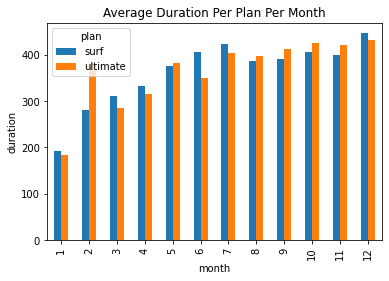

In [61]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.
avg_call = df_agg.pivot_table(index='plan', columns='month', values='duration', aggfunc='mean')
avg_call.T.plot.bar(ylabel="duration", title="Average Duration Per Plan Per Month")

array([<AxesSubplot:title={'center':'surf'}>,
       <AxesSubplot:title={'center':'ultimate'}>], dtype=object)

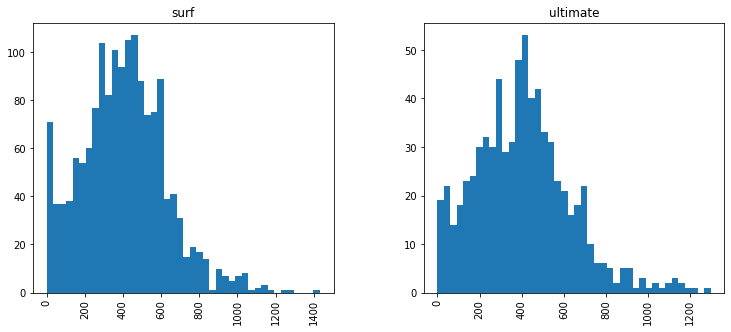

In [62]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
call_hist = df_agg.duration.hist(by=df_agg['plan'], bins=42, figsize=(12,5))
call_hist

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [63]:
#Calculate the mean and the variance of the monthly call duration
call_mean_var = df_agg.pivot_table(index='plan', columns='month', values='duration', aggfunc=['mean', 'var'])
call_mean_var.head()

mean                                                         \
month        1           2      3           4           5           6    
plan                                                                     
surf      193.0  281.111111  311.0  332.460000  376.818182  406.701031   
ultimate  183.5  379.571429  285.5  315.952381  383.379310  349.957447   

                                                          ...           var  \
month             7           8           9           10  ...            3    
plan                                                      ...                 
surf      424.314050  387.067901  390.907216  405.814346  ...  31999.545455   
ultimate  404.118644  396.859155  413.162791  425.066038  ...  53963.181818   

                                                                  \
month               4             5             6             7    
plan                                                               
surf      45613.600408  53134.887560  40730.982603  54309.300551   
ultimate  30977.847619  39409.172414  37833.128585  64974.382233   

                                                                                
month               8             9             10            11            12  
plan                                                                            
surf      48598.871137  41495.804818  46791.872166  46012.236674  56915.570581  
ultimate  47492.351308  50911.220246  48152.938455  54409.441320  55714.050155  

[2 rows x 24 columns]

<AxesSubplot:title={'center':'duration'}, xlabel='plan'>

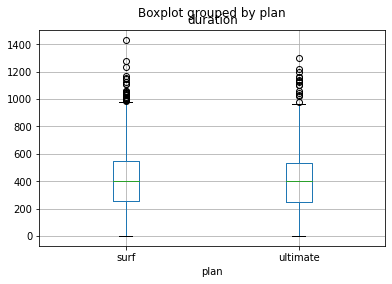

In [64]:
call_boxplot = df_agg.groupby(['plan','user_id','month'])['duration'].mean().reset_index()
call_boxplot.boxplot(column='duration', by='plan')

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

### Messages

<AxesSubplot:title={'center':'Average # of Messages Per Plan Per Month'}, xlabel='month', ylabel='messages'>

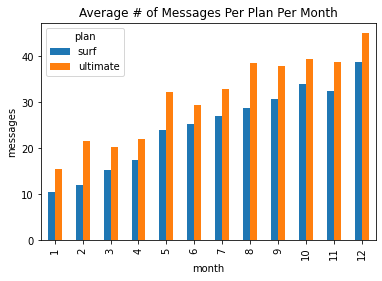

In [65]:
# Compare the number of messages users of each plan tend to send each month
avg_message = df_agg.pivot_table(index='plan', columns='month', values='message_count', aggfunc='mean')
avg_message.T.plot.bar(ylabel="messages", title="Average # of Messages Per Plan Per Month")


array([<AxesSubplot:title={'center':'surf'}>,
       <AxesSubplot:title={'center':'ultimate'}>], dtype=object)

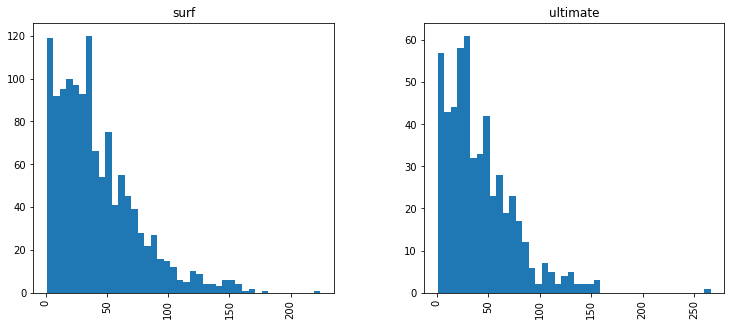

In [66]:
# Compare the amount of internet traffic consumed by users per plan
df_messages_agg.message_count.hist(by=df_agg['plan'], bins=42, figsize=(12,5))

In [67]:
#Calculate the mean and the variance of the monthly message count
message_mean_var = df_agg.pivot_table(index='plan', columns='month', values='message_count', aggfunc=['mean', 'var'])
message_mean_var.head()

mean                                                        \
month       1          2         3          4          5          6    
plan                                                                   
surf      10.5  12.000000  15.26087  17.400000  24.012987  25.298969   
ultimate  15.5  21.571429  20.25000  22.047619  32.103448  29.340426   

                                                      ...         var  \
month            7          8          9          10  ...          3    
plan                                                  ...               
surf      27.033058  28.777778  30.762887  33.839662  ...  346.565217   
ultimate  32.830508  38.478873  37.895349  39.443396  ...  654.386364   

                                                                        \
month             4            5           6           7            8    
plan                                                                     
surf      501.591837   847.197198  914.920103  923.915565  1029.515528   
ultimate  544.147619  1297.310345  857.620722  960.488019  1196.367404   

                                                              
month              9            10           11           12  
plan                                                          
surf      1003.829496  1275.465708  1065.344034  1458.158612  
ultimate  1050.918331  1221.106289  1232.669166  1549.419956  

[2 rows x 24 columns]

<AxesSubplot:title={'center':'message_count'}, xlabel='plan'>

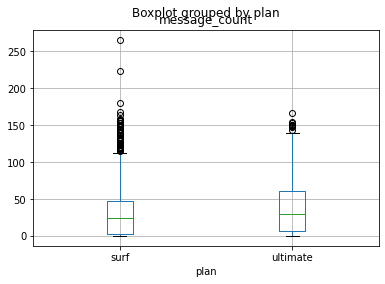

In [68]:
# Plot a boxplot to visualize the distribution of the monthly call duration
message_boxplot = df_agg.groupby(['plan','user_id','month'])['message_count'].mean().reset_index()
message_boxplot.boxplot(column='message_count', by='plan')


[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Internet

<AxesSubplot:title={'center':'Average Internet Usage Per Plan Per Month'}, xlabel='month', ylabel='internet'>

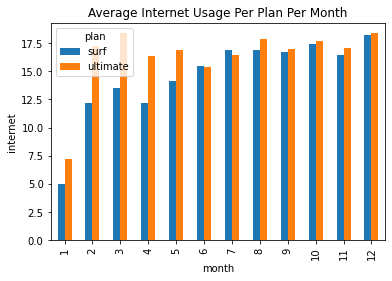

In [69]:
# Compare the amount of internet users of each plan tend to use each month
avg_int = df_agg.pivot_table(index='plan', columns='month', values='gb_used', aggfunc='mean')
avg_int.T.plot.bar(ylabel="internet", title="Average Internet Usage Per Plan Per Month")

array([<AxesSubplot:title={'center':'surf'}>,
       <AxesSubplot:title={'center':'ultimate'}>], dtype=object)

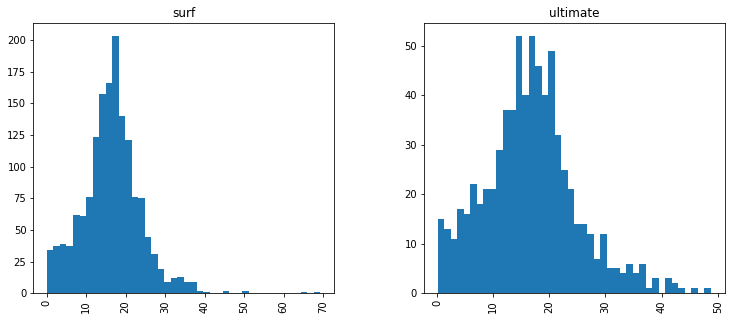

In [70]:
# Compare the amount of internet traffic consumed by users per plan
df_internet_agg.gb_used.hist(by=df_agg['plan'], bins=42, figsize=(12,5))

In [71]:
#Calculate the mean and the variance of the monthly internet usage
int_mean_var = df_agg.pivot_table(index='plan', columns='month', values='gb_used', aggfunc=['mean', 'var'])
int_mean_var.head()

mean                                                         \
month       1          2          3          4          5          6    
plan                                                                    
surf      5.00  12.222222  13.565217  12.220000  14.116883  15.484536   
ultimate  7.25  17.285714  18.416667  16.333333  16.862069  15.425532   

                                                      ...         var  \
month            7          8          9          10  ...          3    
plan                                                  ...               
surf      16.876033  16.882716  16.690722  17.409283  ...   63.984190   
ultimate  16.491525  17.845070  17.011628  17.716981  ...  138.628788   

                                                                            \
month            4          5          6          7          8          9    
plan                                                                         
surf      56.215918  58.183527  47.752363  61.476171  71.420942  49.240639   
ultimate  85.833333  54.194581  68.858464  64.254237  58.047082  47.258687   

                                           
month            10         11         12  
plan                                       
surf      60.725846  54.607824  69.210841  
ultimate  54.604852  54.390701  58.841060  

[2 rows x 24 columns]

<AxesSubplot:title={'center':'gb_used'}, xlabel='plan'>

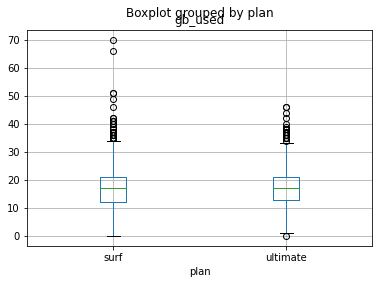

In [72]:
# Plot a boxplot to visualize the distribution of the monthly call duration
int_boxplot = df_agg.groupby(['plan','user_id','month'])['gb_used'].mean().reset_index()
int_boxplot.boxplot(column='gb_used', by='plan')

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [73]:
df_agg

,user_id,month,duration,gb_used,message_count,plan,churn_date,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,min_over,data_over,msg_over,call_cost_additional,data_cost_additional,msg_cost_additional
0,1000,12,117.0,2.0,11.0,ultimate,NaN,1000,3000,70,7,0.01,0.01,30.0,0.0,0.0,0.0,0.0,0.0,0.00
1,1001,8,173.0,7.0,30.0,surf,NaN,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.0,0.0,0.0,0.00
2,1001,9,297.0,14.0,44.0,surf,NaN,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.0,0.0,0.0,0.00
3,1001,10,374.0,22.0,53.0,surf,NaN,50,500,20,10,0.03,0.03,15.0,0.0,7.0,3.0,0.0,70.0,0.09
4,1001,11,404.0,19.0,36.0,surf,NaN,50,500,20,10,0.03,0.03,15.0,0.0,4.0,0.0,0.0,40.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,10,0.0,13.0,76.0,surf,NaN,50,500,20,10,0.03,0.03,15.0,0.0,0.0,26.0,0.0,0.0,0.78
2289,1349,11,0.0,17.0,72.0,surf,NaN,50,500,20,10,0.03,0.03,15.0,0.0,2.0,22.0,0.0,20.0,0.66
2290,1349,12,0.0,13.0,61.0,surf,NaN,50,500,20,10,0.03,0.03,15.0,0.0,0.0,11.0,0.0,0.0,0.33
2291,1361,5,0.0,2.0,2.0,surf,NaN,50,500,20,10,0.03,0.03,15.0,0.0,0.0,0.0,0.0,0.0,0.00


In [74]:
# what is revenue
# base price + minute overage + data overage + text overage
df_agg['revenue'] = df_agg['usd_monthly_pay'] + \
                    df_agg['call_cost_additional'] +\
                    df_agg['data_cost_additional'] +\
                    df_agg['msg_cost_additional']

In [75]:
df_agg['revenue'].describe()

count    2293.000000
mean       64.089167
std        46.543181
min        20.000000
25%        22.460000
50%        70.000000
75%        70.000000
max       588.630000
Name: revenue, dtype: float64

<AxesSubplot:title={'center':'Average Revenue Per Plan Per Month'}, xlabel='month', ylabel='revenue'>

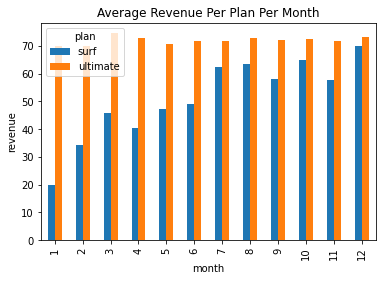

In [76]:
# Compare average revenue per each plan per each distinct month. Plot a bar plot to visualize it.
avg_revenue = df_agg.pivot_table(index='plan', columns='month', values='revenue', aggfunc='mean')
avg_revenue.T.plot.bar(ylabel="revenue", title="Average Revenue Per Plan Per Month")

array([<AxesSubplot:title={'center':'surf'}>,
       <AxesSubplot:title={'center':'ultimate'}>], dtype=object)

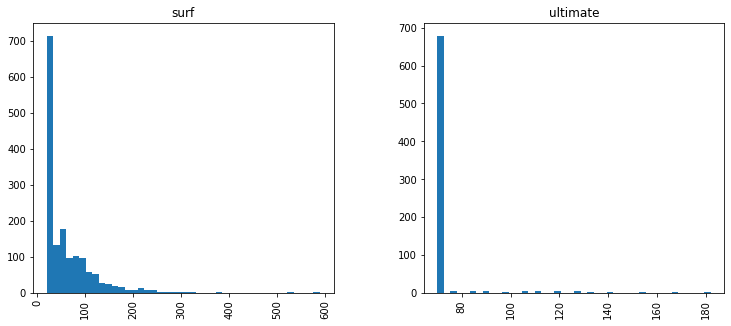

In [77]:
# Compare revenue per plan each month. Plot a histogram.
df_agg.revenue.hist(by=df_agg['plan'], bins=42, figsize=(12,5))

In [78]:
#Calculate the mean and the variance of the monthly revenue
revenue_mean_var = df_agg.pivot_table(index='plan', columns='month', values='revenue', aggfunc=['mean', 'var'])
revenue_mean_var.head()

mean                                                       \
month       1          2          3        4          5          6    
plan                                                                  
surf      20.0  34.256667  45.791304  40.4562  47.229610  48.925258   
ultimate  70.0  70.000000  74.666667  73.0000  70.724138  71.638298   

                                                      ...          var  \
month            7          8          9          10  ...           3    
plan                                                  ...                
surf      62.218099  63.576358  57.941959  65.049325  ...  1507.698903   
ultimate  71.898305  72.859155  72.034884  72.311321  ...   145.515152   

                                                                           \
month              4            5            6            7            8    
plan                                                                        
surf      1197.234702  1948.896591  1977.084073  2921.055372  3573.558826   
ultimate   120.400000    15.206897    75.018501   104.472238   154.808451   

                                                              
month              9            10           11           12  
plan                                                          
surf      2252.087506  3179.017877  2485.102346  4590.607748  
ultimate    75.939945   169.606918    94.668416   212.861192  

[2 rows x 24 columns]

<AxesSubplot:title={'center':'revenue'}, xlabel='plan'>

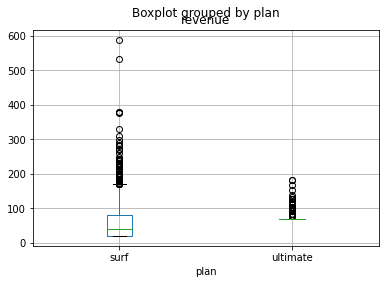

In [79]:
# Plot a boxplot to visualize the distribution of the monthly revenue
revenue_boxplot = df_agg.groupby(['plan','user_id','month'])['revenue'].mean().reset_index()
revenue_boxplot.boxplot(column='revenue', by='plan')

[Formulate conclusions about how the revenue differs between the plans.]

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

In [80]:
# Test the hypotheses
# that the average revenue from users of the Ultimate and Surf calling plans differs
#the null: the average revenue of Ultimate plan differs from Surf Plan
#the alternative: the average revenue of Ultimate and Surf are similar

sample1 = df_agg[df_agg['plan'] == 'surf']['revenue']

sample2 = df_agg[df_agg['plan'] == 'ultimate']['revenue']

alpha = 0.05

results = st.ttest_ind(sample1, sample2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cannot reject the null hypothesis') 

p-value:  9.265070552566982e-09
We reject the null hypothesis


[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [81]:
#what city does each user live in
df_city = df_users[['user_id','city']]
df_city

,user_id,city
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,"Tulsa, OK MSA"
4,1004,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...
495,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,"New Orleans-Metairie, LA MSA"
497,1497,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [82]:
#agg the city column into our df_agg
df_agg = df_agg.merge(df_city, how='left', on='user_id', validate='m:1')

In [83]:
#create a new column that shows just the state 
df_agg['city_update'] = df_agg['city'].apply(lambda x: x.split(",")[-1].split(" ")[1])
df_agg.head(1)

,user_id,month,duration,gb_used,message_count,plan,churn_date,messages_included,minutes_included,usd_monthly_pay,...,gb_per_month_included,min_over,data_over,msg_over,call_cost_additional,data_cost_additional,msg_cost_additional,revenue,city,city_update
0,1000,12,117.0,2.0,11.0,ultimate,NaN,1000,3000,70,...,30.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,"Atlanta-Sandy Springs-Roswell, GA MSA",GA


In [84]:
#query the new column to select users who live in NY or NJ
ny_nj_df = df_agg.query("city_update.str.contains('NY')",engine='python').reset_index().drop('index',axis=1)
ny_nj_df['city_update'] = 'NY-NJ'
ny_nj_df.head()

,user_id,month,duration,gb_used,message_count,plan,churn_date,messages_included,minutes_included,usd_monthly_pay,...,gb_per_month_included,min_over,data_over,msg_over,call_cost_additional,data_cost_additional,msg_cost_additional,revenue,city,city_update
0,1014,11,147.0,2.0,9.0,surf,NaN,50,500,20,...,15.0,0.0,0.0,0.0,0.00,0.0,0.00,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ
1,1014,12,1048.0,8.0,64.0,surf,NaN,50,500,20,...,15.0,548.0,0.0,14.0,16.44,0.0,0.42,36.86,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ
2,1022,5,287.0,5.0,0.0,surf,2018-09-07,50,500,20,...,15.0,0.0,0.0,0.0,0.00,0.0,0.00,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ
3,1022,6,452.0,23.0,0.0,surf,2018-09-07,50,500,20,...,15.0,0.0,8.0,0.0,0.00,80.0,0.00,100.00,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ
4,1022,7,447.0,10.0,0.0,surf,2018-09-07,50,500,20,...,15.0,0.0,0.0,0.0,0.00,0.0,0.00,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ


In [85]:
#query the new column to select users who live in NY or NJ
ny_nj_df = df_agg.query("city_update.str.contains('NY')",engine='python').reset_index().drop('index',axis=1)
ny_nj_df['city_check'] = 'NY-NJ'

ny_nj_df = ny_nj_df.groupby(['user_id','city_check']).count().reset_index()[['user_id','city_check']]
ny_nj_df

,user_id,city_check
0,1014,NY-NJ
1,1022,NY-NJ
2,1024,NY-NJ
3,1027,NY-NJ
4,1031,NY-NJ
...,...,...
80,1469,NY-NJ
81,1482,NY-NJ
82,1494,NY-NJ
83,1495,NY-NJ


In [86]:
#merge the ny_nj_df with df_agg
df_agg = df_agg.merge(ny_nj_df, how='left',on='user_id',validate="m:1")

# Fill missing values with constant
df_agg['city_check'].fillna('Not NY-NJ', inplace=True)

#extract the value for not NY-NJ 
_ny = df_agg[df_agg['city_check']=='NY-NJ']['revenue']

#extract the value for not NY-NJ 
not_ny = df_agg[df_agg['city_check']=='Not NY-NJ']['revenue']

In [87]:
# Test the hypotheses
#null: ny and nj revenue is different than other regions
#alt: there is no difference 
alpha = 0.05
results = st.ttest_ind(_ny, not_ny)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cannot reject the null hypothesis') 

p-value:  0.09552280684538893
We cannot reject the null hypothesis


## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

After loading my libraries, I looked at the columns and rows of 5 different dataframes: plans, users, calls, messages, and internet. I made necessary adjusts to the data: creating new columns, fixing data types, converting, rounding, etc. With clean data, I was able to make a new aggergated data frame. This data frame aggregates(plan, calls, messages, and internet)data per user per month in order to have just one record. Then I begin my analysis of the data.

With the revenue bar chart in section 1.12, I can visualize the avg revenue per plan, per month. I conclude that the ultimate plan generates more revenue, expecially Jan-June. July-December, the surf plan avg revenue increases significantly (Compare January to December). The ultimate plan generates nearly the same avg renenue all 12 months.

The company wants to retain users by providing them with a plan that best fits their needs (usage), while also generating the highest revenue. If my goal is to increase customer satisfction, I want to pay attention to the last 6 months of my bar chart. The surf plan avg revenue increases due to fees (going over the monthly limit). If I suggest those users upgrade to the ultimate plan: I am able to give the user a plan that better fits their needs(by upgrading them to a plan with more usgage, only for those who need it), while also increasing revenue(more users in the ultimate plan). 